
Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [1]:
#env set up
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from env import host, user, password
np.random.seed(123)

def get_db_url(user,host,password,dbname):
    url = f'mysql+pymysql://{user}:{password}@{host}/dbname'
    return url 

In [2]:
n1 = 40
mean1 = 90
sd1 = 15
n2 = 50
mean2 = 100
sd2 = 20
α=0.05

In [3]:
office1 = stats.norm(mean1,sd1).rvs(n1)

In [4]:
type(office1)

numpy.ndarray

In [5]:
office2 = stats.norm(mean2,sd2).rvs(n2)

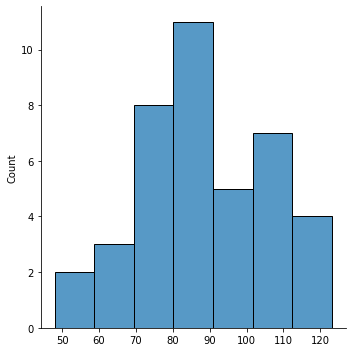

In [6]:
sns.displot(office1)

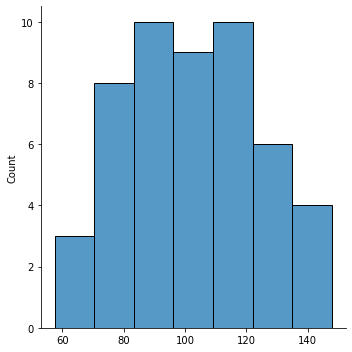

In [7]:
sns.displot(office2)

In [8]:
office2.var()-office1.var()

197.85291241686463

In [9]:
t_1,p_1=stats.levene(office1,office2)
t_1,p_1

(4.1153444488036595, 0.04551874813294119)

In [10]:
t, p = stats.ttest_ind(office1, office2, equal_var = False)
t, p

(-3.2583006829737267, 0.001593825513361712)

In [11]:
if p < α:
    print(f'Most likely: H_1')
else:
    print(f'Most likely: H_O')

Most likely: H_1


In [12]:
stats.ttest_ind_from_stats(mean1, sd1, n1,mean2, sd2,n2, equal_var = False)

Ttest_indResult(statistic=-2.7091418459143854, pvalue=0.00811206270346016)

## 2 - Load the mpg dataset and use it to answer the following questions:

In [13]:
from pydataset import data
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [14]:
# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
# Ho = there is no difference in fuel-efficiency in cars from 2008 vs 1999
# Ha = there is a difference in fuel-efficiency in cars from 2008 vs 1999
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
 11  total_mpg     234 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 23.8+ KB


<AxesSubplot:>

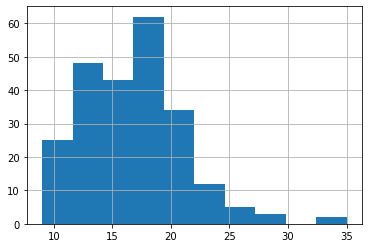

In [15]:
mpg['total_mpg'] = (mpg.cty + mpg.hwy) / 2
mpg.info()
mpg.cty.hist()


<AxesSubplot:>

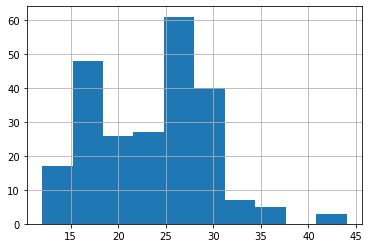

In [16]:
mpg.hwy.hist()


<AxesSubplot:>

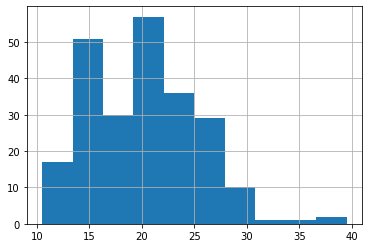

In [17]:
mpg.total_mpg.hist()

In [18]:
#Looking for difference between city, highway, and total MPG
h2008 = mpg[mpg.year ==2008].hwy
h1999 = mpg[mpg.year ==1999].cty
c2008 = mpg[mpg.year ==2008].hwy
c1999 = mpg[mpg.year ==1999].cty
t2008 = mpg[mpg.year ==2008].total_mpg
t1999 = mpg[mpg.year ==1999].total_mpg
α=0.05

In [19]:
# Highway data
t, p = stats.ttest_ind(h2008, h1999, equal_var = False)
t, p 

(9.466618497423587, 5.10782454698565e-18)

In [20]:
if (p/2 < α) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


In [21]:
# City Data
t, p = stats.ttest_ind(c2008, c1999, equal_var = True)
t, p 

(9.466618497423585, 3.4421244174046716e-18)

In [22]:
if (p/2 < α) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


In [23]:
# Total MPG data
t, p = stats.ttest_ind(t2008, t1999, equal_var = False)
t, p

(-0.21960177245940962, 0.8263750772060638)

In [24]:
if (p/2 < α) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


### Are compact cars more fuel-efficient than the average car?

In [25]:
#Ho compact cars are not more fuel-efficient than average car.
#Ha - compact cars are more fuel-efficient than aveage car
mpg['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

In [26]:
compact_t = mpg[mpg['class']=='compact'].total_mpg
compact_h = mpg[mpg['class']=='compact'].hwy
compact_c = mpg[mpg['class']=='compact'].cty

(<seaborn.axisgrid.FacetGrid at 0x151616c10>,
 <seaborn.axisgrid.FacetGrid at 0x15146d8e0>)

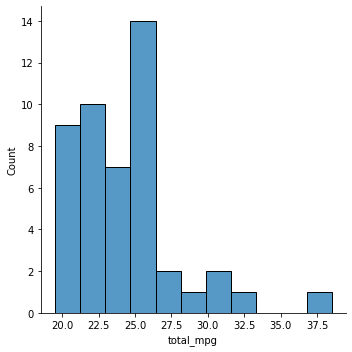

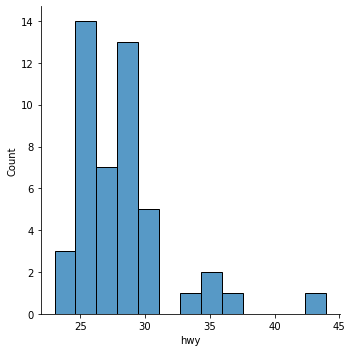

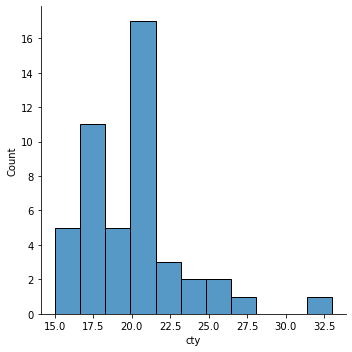

In [27]:
sns.displot(compact_t), sns.displot(compact_h), sns.displot(compact_c)

In [28]:
# Total MPG testing
t,p=stats.ttest_1samp(compact_t,mpg.total_mpg.mean())
t,p/2

(7.896888573132535, 2.0992818971585593e-10)

In [29]:
if p/2 > α:
    print("We reject the null hypothesis")
elif t < 0 :
    print("We reject the null hypothesis for t-value")
else: 
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


In [30]:
#Highway test
t,p=stats.ttest_1samp(compact_h,mpg.total_mpg.mean())
t,p/2
if p/2 > α:
    print("We reject the null hypothesis")
elif t < 0 :
    print("We reject the null hypothesis for t-value")
else: 
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


In [31]:
# City Test
t,p=stats.ttest_1samp(compact_c,mpg.total_mpg.mean())
t,p/2
if p/2 > α:
    print("We reject the null hypothesis")
elif t < 0 :
    print("We reject the null hypothesis for t-value")
else: 
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


### Do manual cars get better gas mileage than automatic cars?

In [32]:
# Ho - manual caras get the same milage than automatic cars
# Ha - manual cars do get better gas mileage than authomatic cars
mpg['trans'].value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [33]:
manuals = mpg[mpg['trans'].astype(str).str[0] =='m'].total_mpg
auto  = mpg[mpg['trans'].astype(str).str[0] =='a'].total_mpg
auto.count()

157

In [34]:
manuals.count()

77

(<seaborn.axisgrid.FacetGrid at 0x1517bf580>,
 <seaborn.axisgrid.FacetGrid at 0x1517651f0>)

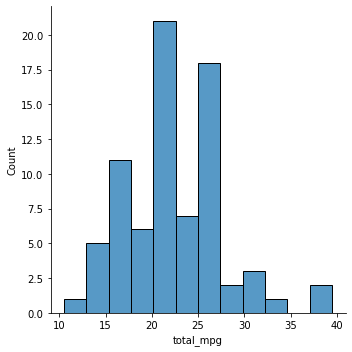

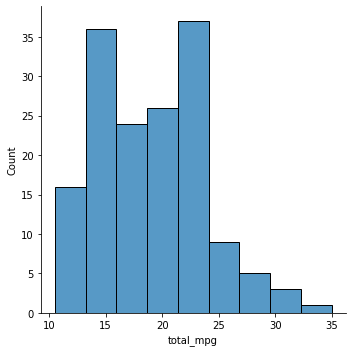

In [35]:
sns.displot(manuals), sns.displot(auto)

In [36]:
manuals.var(), auto.var()

(26.635167464114826, 21.942777233382337)

In [37]:
stats.levene(manuals, auto)

LeveneResult(statistic=0.20075824847529639, pvalue=0.6545276355131857)

In [38]:
stats.ttest_ind(manuals, auto)

Ttest_indResult(statistic=4.593437735750014, pvalue=7.154374401145685e-06)

In [39]:
if p/2 > α:
    print("We reject the null hypothesis")
elif t < 0 :
    print("We reject the null hypothesis for t-value")
else: 
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


## Correlation Exercises

### 1. Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [40]:
df = pd.read_csv('telco_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [41]:
from math import sqrt

from scipy import stats
from pydataset import data

In [42]:
#Look at Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [43]:
# drop missing values
df = df.dropna()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [45]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


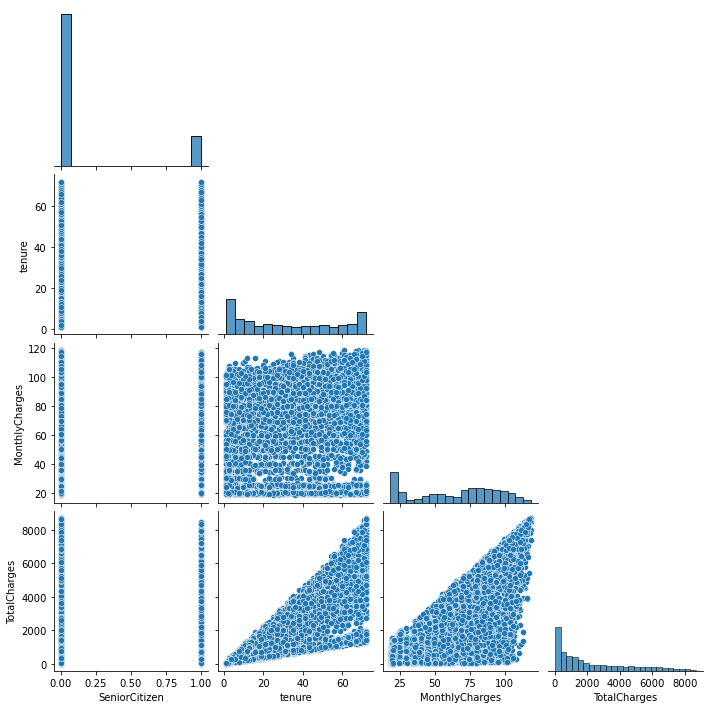

In [46]:
tenure = df.tenure
monthly_charges = df.MonthlyCharges
tcharges = df.TotalCharges

sns.pairplot(df, corner= True)

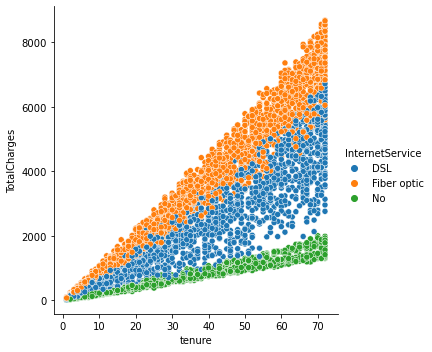

In [47]:
sns.relplot(data = df, x='tenure', y='TotalCharges', hue='InternetService')

In [48]:
n = df.shape[0]
degf = n-2
α=0.05
conf_interval = 1-α

# Ho: there is no linear correlation between tenure and charges
# Ha: there is a linear correlation between tenure and charges

x = df.tenure
y = df.MonthlyCharges

def std(x):
    variance = ((x-x.mean())**2).sum()/n
    return sqrt(variance)
r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (std(x) * std(y))
r_xy

0.24686176664089346

In [49]:
t = (r_xy * sqrt(n - 2)) / sqrt(1 - r_xy**2)
t

21.35920054761362

In [50]:
p = stats.t.sf(t, df=degf) * 2 # *2 for a two-tailed test
p

3.989821323220255e-98

In [51]:
if p < α:
    print(f'Reject Ho')
else:
    print(f'Fail to Reject Ho')

Reject Ho


In [52]:
corr, p = stats.pearsonr (x,y)
corr, p

(0.24686176664089593, 3.989821323249241e-98)

In [53]:
if corr <= .2:
    print("No Correlation")
elif corr <= .5:
    print ("Weak Correlation")
elif corr <= 0.8:
    print ("Moderate Correlation")
else:
    print("Strong Correlation")

Weak Correlation


In [54]:
# Total Charges
x = df.tenure
y = tcharges
r_xy

0.24686176664089346

In [55]:
t = (r_xy * sqrt(n - 2)) / sqrt(1 - r_xy**2)
t

21.35920054761362

In [56]:
p = stats.t.sf(t, df=degf) * 2 # *2 for a two-tailed test
p

3.989821323220255e-98

In [57]:
if p < α:
    print(f'Reject Ho')
else:
    print(f'Fail to Reject Ho')

Reject Ho


In [58]:
x

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7032, dtype: int64

In [59]:
corr, p = stats.pearsonr (x, y)
corr, p

(0.8258804609332093, 0.0)

In [60]:
if corr <= .2:
    print("No Correlation")
elif corr <= .5:
    print ("Weak Correlation")
elif corr <= 0.8:
    print ("Moderate Correlation")
else:
    print("Strong Correlation")

Strong Correlation


In [61]:
# What happens if you control for phone and internet service?
df.InternetService.value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [62]:
df.PhoneService.value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

In [63]:
#Building filters
phonesample = df[df.PhoneService == 'Yes']
nophonesample=df[df.PhoneService == 'No']
internetsample = df[df.InternetService != 'No']
nointernetsample = df[df.InternetService =='No']

In [64]:
# Reassign variables with Filters
# Phone Sample
n = phonesample.shape[0]
x = df.tenure
y = df.MonthlyCharges
r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (std(x) * std(y))
p = stats.t.sf(t, df=degf) * 2
corr, p = stats.pearsonr (x,y)
r_xy, t, p 

(0.2468617666408935, 21.35920054761362, 3.989821323249241e-98)

In [65]:
if corr <= .2:
    print("No Correlation")
elif corr <= .5:
    print ("Weak Correlation")
elif corr <= 0.8:
    print ("Moderate Correlation")
else:
    print("Strong Correlation")

Weak Correlation


In [66]:
if p < α:
    print(f'Reject Ho')
else:
    print(f'Fail to Reject Ho')

Reject Ho


In [67]:
# No Phone sample & monthly charges
n = nophonesample.shape[0]
x = df.tenure
y = df.MonthlyCharges
r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (std(x) * std(y))
p = stats.t.sf(t, df=degf) * 2
corr, p = stats.pearsonr (x,y)
r_xy, t, p 

(0.24686176664089343, 21.35920054761362, 3.989821323249241e-98)

In [68]:
# Internet Sample & Monthly charges
n = internetsample.shape[0]
x = df.tenure
y = df.MonthlyCharges
r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (std(x) * std(y))
p = stats.t.sf(t, df=degf) * 2
corr, p = stats.pearsonr (x,y)
r_xy, t, p 

(0.24686176664089343, 21.35920054761362, 3.989821323249241e-98)

In [69]:
# No Internet & Monthly Charges
n = nointernetsample.shape[0]
x = df.tenure
y = df.MonthlyCharges
r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (std(x) * std(y))
p = stats.t.sf(t, df=degf) * 2
corr, p = stats.pearsonr (x,y)
r_xy, t, p 

(0.24686176664089343, 21.35920054761362, 3.989821323249241e-98)

In [70]:
# No phone Sample & Total Charges
n = nophonesample.shape[0]
x = df.tenure
y = tcharges
r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (std(x) * std(y))
p = stats.t.sf(t, df=degf) * 2
corr, p = stats.pearsonr (x,y)
r_xy, t, p 

(0.825880460933202, 21.35920054761362, 0.0)

In [71]:
# No internet sample & total charges
n = nointernetsample.shape[0]
x = df.tenure
y = tcharges
r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (std(x) * std(y))
p = stats.t.sf(t, df=degf) * 2
corr, p = stats.pearsonr (x,y)
r_xy, t, p 

(0.8258804609332019, 21.35920054761362, 0.0)

### 2. Use the employees database.

 - Is there a relationship between how long an employee has been with the company and their salary

In [72]:
from env import host, user, password

def get_db_url(user,host,password,dbname):
    url = f'mysql+pymysql://{user}:{password}@{host}/employees'
    return url

dbname = 'employees'
url = get_db_url(user,host,password,dbname)

In [73]:
# Working with Current employees to decrease file size
query = '''
SELECT emp_no, SUM(salary) AS salary, DATEDIFF(CURDATE(),MIN(to_date)) AS tenure
FROM salaries
GROUP BY emp_no;
'''

In [74]:
df = pd.read_sql(query, url)
df.head()

,emp_no,salary,tenure
0,10001,1281612.0,12786
1,10002,413127.0,9095
2,10003,301212.0,9339
3,10004,904196.0,12628
4,10005,1134585.0,11612


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   emp_no  300024 non-null  int64  
 1   salary  300024 non-null  float64
 2   tenure  300024 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 6.9 MB


In [76]:
# Is there a relationship between how long an employee has been with the company and their salary?
r, p = stats.pearsonr(df.salary, df.tenure)
r, p

(0.7553157610561608, 0.0)

In [77]:
if r <= .2:
    print("No Correlation")
elif r <= .5:
    print ("Weak Correlation")
elif r <= 0.8:
    print ("Moderate Correlation")
else:
    print("Strong Correlation")

Moderate Correlation


In [78]:
# Is there a relationship between how long an employee has been with the company and the number of titles they have had?
from env import host, user, password
dbname = 'employees'
emp_title=pd.read_sql(
	'''
    WITH emp_title_count AS (
        SELECT emp_no, COUNT(*) as n_titles
        FROM employees e
        JOIN titles t USING (emp_no)
        GROUP BY emp_no
    )
    SELECT
        e.emp_no,
        DATEDIFF((SELECT MAX(hire_date) FROM employees), e.hire_date) AS tenure,
        n_titles
    FROM employees e
    JOIN emp_title_count USING (emp_no)
	;
	''', 
	get_db_url(user,host,password,dbname))

In [79]:
emp_title.head()

,emp_no,tenure,n_titles
0,10001,4964,1
1,10002,5181,1
2,10003,4901,1
3,10004,4806,2
4,10005,3790,2


In [80]:
r, p = stats.pearsonr(emp_title.tenure,emp_title.n_titles)
r, p 

(0.2665989299134097, 0.0)

In [81]:
if r <= .2:
    print("No Correlation")
elif r <= .5:
    print ("Weak Correlation")
elif r <= 0.8:
    print ("Moderate Correlation")
else:
    print("Strong Correlation")

Weak Correlation


### 3. Use the sleepstudy data. Is there a relationship between days and reaction time?

In [82]:
sleep = data('sleepstudy')
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


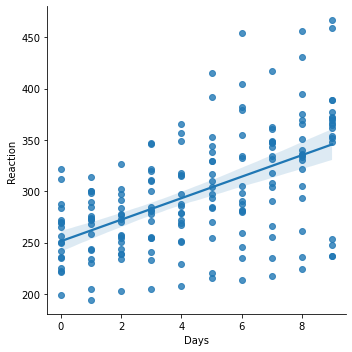

In [120]:
sns.lmplot(data=sleep, x='Days', y= 'Reaction')

In [83]:
r, p = stats.pearsonr(sleep.Days,sleep.Reaction)
r, p 

(0.5352302262650255, 9.89409632221439e-15)

In [84]:
if r <= .2:
    print("No Correlation")
elif r <= .5:
    print ("Weak Correlation")
elif r <= 0.8:
    print ("Moderate Correlation")
else:
    print("Strong Correlation")

Moderate Correlation


# Chi Square Exercises

### 1. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

In [85]:
# First attempt, which resulted in extreme Chi2.  Reworked below for correct answer.
index = ['Mac', 'Non-mac']
columns = ['Codeup', 'Student']

observed = pd.DataFrame([[49,20], [1,30]], index = index, columns = columns)
n = observed.values.sum()

expected = pd.DataFrame([[.345,.345], [.155,.155]], index = index, columns = columns)

chi2 = ((observed - expected)**2 / expected).values.sum()

nrows, ncols = observed.shape

degrees_of_freedom = (nrows-1)*(ncols -1)

p = stats.chi2(degrees_of_freedom).sf(chi2)

print('observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

observed
         Codeup  Student
Mac          49       20
Non-mac       1       30
---
Expected
         Codeup  Student
Mac       0.345    0.345
Non-mac   0.155    0.155
---

chi^2 = 13732.7438
p     = 0.0000


In [86]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[49 20]
 [ 1 30]]
---
Expected

[[34.5 34.5]
 [15.5 15.5]]
---

chi^2 = 36.6526
p     = 0.0000


In [87]:
#Trying to find why my chi^2 is so far off from the function for Chi^2
# Error was expected '* n ' was missed in original calculation
index = ['Mac', 'Non-mac']
columns = ['Codeup', 'Student']

observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
n = observed.values.sum()

expected = pd.DataFrame([[.345, .345], [.155, .155]], index=index, columns=columns) * n

chi2 = ((observed - expected)**2 / expected).values.sum()

nrows, ncols = observed.shape

degrees_of_freedom = (nrows - 1) * (ncols - 1)

p = stats.chi2(degrees_of_freedom).sf(chi2)

print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
         Codeup  Student
Mac          49       20
Non-mac       1       30
---
Expected
         Codeup  Student
Mac        34.5     34.5
Non-mac    15.5     15.5
---

chi^2 = 39.3174
p     = 0.0000


### 2. Choose another 2 categorical variables from the mpg dataset and perform a  chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.


In [88]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
 11  total_mpg     234 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 23.8+ KB


In [89]:
n = mpg.shape[0]
manu_proportions = mpg.manufacturer.value_counts()/n
manu_proportions

dodge         0.158120
toyota        0.145299
volkswagen    0.115385
ford          0.106838
chevrolet     0.081197
audi          0.076923
hyundai       0.059829
subaru        0.059829
nissan        0.055556
honda         0.038462
jeep          0.034188
pontiac       0.021368
land rover    0.017094
mercury       0.017094
lincoln       0.012821
Name: manufacturer, dtype: float64

In [90]:
# manuals = mpg[mpg['trans'].astype(str).str[0] =='m'].total_mpg
# auto  = mpg[mpg['trans'].astype(str).str[0] =='a'].total_mpg
trans_prop = mpg.trans.value_counts() / n
trans_prop

auto(l4)      0.354701
manual(m5)    0.247863
auto(l5)      0.166667
manual(m6)    0.081197
auto(s6)      0.068376
auto(l6)      0.025641
auto(av)      0.021368
auto(s5)      0.012821
auto(s4)      0.012821
auto(l3)      0.008547
Name: trans, dtype: float64

In [91]:
# Need a column for 'A' for auto and 'M' for manual

mpg['transmission'] = mpg.trans.str[0]

In [92]:
trans_prop = mpg.transmission.value_counts() / n
trans_prop

a    0.67094
m    0.32906
Name: transmission, dtype: float64

In [93]:
manu_total_mpg = pd.crosstab(mpg.manufacturer,mpg.transmission)
manu_total_mpg

transmission,a,m
manufacturer,,
audi,11,7
chevrolet,16,3
dodge,30,7
ford,17,8
honda,4,5
hyundai,7,7
jeep,8,0
land rover,4,0
lincoln,3,0


In [94]:
# H0 = manufacturer and trans are not related
# Ha = manufacture and trans are related

In [123]:
chi2, p, degf, expected = stats.chi2_contingency(manu_total_mpg)
if p < α:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


In [96]:
chi2, p, degf, expected = stats.chi2_contingency(manu_total_mpg)

print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

---
Expected
[[12.07692308  5.92307692]
 [12.74786325  6.25213675]
 [24.82478632 12.17521368]
 [16.77350427  8.22649573]
 [ 6.03846154  2.96153846]
 [ 9.39316239  4.60683761]
 [ 5.36752137  2.63247863]
 [ 2.68376068  1.31623932]
 [ 2.01282051  0.98717949]
 [ 2.68376068  1.31623932]
 [ 8.72222222  4.27777778]
 [ 3.35470085  1.64529915]
 [ 9.39316239  4.60683761]
 [22.81196581 11.18803419]
 [18.11538462  8.88461538]]
---

chi^2 = 29.2937
p     = 0.0095


### 3. Use the data from the employees database to answer these questions:
- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
- Is an employee's gender independent of whether or not they are or have been a manager?

In [97]:
dbname = 'employees'
emp=pd.read_sql(
	'''
	SELECT d.dept_name, e.gender
	FROM dept_emp de
		LEFT JOIN employees e USING (emp_no)
		LEFT JOIN departments d using (dept_no)
	WHERE de.to_date > NOW()
		AND (d.dept_name = 'Sales'
			OR d.dept_name = 'Marketing')

	;
	''',
    get_db_url(user,host,password,dbname))

data=pd.read_sql(
	'''
	SELECT *
	FROM employees e
		LEFT JOIN dept_manager dm USING (emp_no)



	;
	''',
     get_db_url(user,host,password,dbname))

In [98]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52543 entries, 0 to 52542
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dept_name  52543 non-null  object
 1   gender     52543 non-null  object
dtypes: object(2)
memory usage: 821.1+ KB


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      300024 non-null  int64 
 1   birth_date  300024 non-null  object
 2   first_name  300024 non-null  object
 3   last_name   300024 non-null  object
 4   gender      300024 non-null  object
 5   hire_date   300024 non-null  object
 6   dept_no     24 non-null      object
 7   from_date   24 non-null      object
 8   to_date     24 non-null      object
dtypes: int64(1), object(8)
memory usage: 20.6+ MB


In [100]:
data.nunique()

emp_no        300024
birth_date      4750
first_name      1275
last_name       1637
gender             2
hire_date       5434
dept_no            9
from_date         16
to_date           16
dtype: int64

In [101]:
#Assigning Variables
emp.dept_name.value_counts()

Sales        37701
Marketing    14842
Name: dept_name, dtype: int64

In [102]:
dept = pd.crosstab(
        emp.dept_name,
        emp.gender)
dept

gender,F,M
dept_name,,
Marketing,5864,8978
Sales,14999,22702


In [103]:
chi2, p, degf, expected = stats.chi2_contingency(dept)
chi2, p, degf, expected

(0.3240332004060638,
 0.5691938610810126,
 1,
 array([[ 5893.2426013,  8948.7573987],
        [14969.7573987, 22731.2426013]]))

### H0 = Gender and deptartment are independent
### Ha = gender and department are not independent

In [104]:
print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

---
Expected
[[ 5893.2426013  8948.7573987]
 [14969.7573987 22731.2426013]]
---

chi^2 = 0.3240
p     = 0.5692


In [105]:
if p > α:
    print(f'Reject Ho')
else:
    print(f'Fail to Reject Ho')

Reject Ho


### Is an employee's gender independent of whether or not they are or have been a manager?

In [106]:
data.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,dept_no,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,None,None,None
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,None,None,None
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,None,None,None
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,None,None,None
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,None,None,None


In [107]:
manager_data = pd.crosstab(
        data.gender,
        data.dept_no.isnull())
manager_data

dept_no,False,True
gender,,
F,13,120038
M,11,179962


- HO = Gender and management are independent
- Ha = Gender and managment are not independent

In [108]:
chi2, p, degf, expected = stats.chi2_contingency(manager_data)

print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

---
Expected
[[9.60331174e+00 1.20041397e+05]
 [1.43966883e+01 1.79958603e+05]]
---

chi^2 = 1.4567
p     = 0.2275


In [109]:
if p > α:
    print(f'Reject Ho')
else:
    print(f'Fail to Reject Ho')

Reject Ho


# More Examples

In [110]:
%matplotlib inline
import pandas as pd
from scipy import stats
from pydataset import data
import viz

tips = data('tips')

In [111]:
tips.shape

(244, 7)

In [112]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [113]:
smoker = pd.crosstab(
        tips.sex,
        tips.smoker)
smoker

smoker,No,Yes
sex,,
Female,54,33
Male,97,60


- Ho = gender and sex are indpendent
- Ha = gender and sex are not independent

In [114]:
chi2, p, degf, expected = stats.chi2_contingency(smoker)

print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

---
Expected
[[53.84016393 33.15983607]
 [97.15983607 59.84016393]]
---

chi^2 = 0.0000
p     = 1.0000


In [115]:
if p > α:
    print(f'Reject Ho')
else:
    print(f'Fail to Reject Ho')

Reject Ho
